<a href="https://colab.research.google.com/github/elirangerbi/Learning-Fashion-Compatibility-Project/blob/main/Learning-Fashion-Compatibility-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://switowski.com/blog/ipython-autoreload
%load_ext autoreload
%autoreload 2
# https://stackoverflow.com/questions/36786722/how-to-display-full-output-in-jupyter-not-only-last-result
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
import os
import sys

import pandas as pd
import numpy as np
from pandas import json_normalize

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [4]:
from google.colab import drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
CATEGORY = 'category'
CATEGORY_ID = 'category_id'
CATEGORYTYPE = 'categorytype'
CATEGORYTYPE_ID = 'categorytype_id'

order = list(range(5))
dataset_root = '../dataset-MarylandPolyvore-master/main/labels'
dataset_root_gdrive = '/content/drive/My Drive/Colab Notebooks/Learning Fashion Compatibility \
Project/dataset-MarylandPolyvore-master/main'

def LoadJsonFile(mode='test'):
  # mode = 'test'

  json_file = os.path.join(
      dataset_root_gdrive, 'labels','{}_no_dup.json'.format(mode))
  print(json_file)
  df_items = json_normalize(
      pd.read_json(json_file).to_dict(orient='records'),
      'items', 'set_id')
  df_items = df_items\
      .rename(columns={'categoryid': CATEGORY_ID})

  ctg_tsv_file = os.path.join(
      dataset_root_gdrive, 'labels',
      'category2categorytype.tsv')
  df_ctg = pd.read_csv(ctg_tsv_file, sep='\t').drop('num items', axis=1)

  df_items = df_items.merge(df_ctg, how='left', on=CATEGORY_ID)

  # rename the image column to tid as in the json files and retrieve only the tid
  df_items= df_items.rename(columns={"image": "tid"})
  df_items['tid'] = df_items['tid'].apply(lambda x: x.split('=')[-1])

  num_sets = df_items['set_id'].unique().__len__()
  num_items = df_items['tid'].unique().__len__()
  print("In {} set: the number of sets are {}, the number of items are {}"\
        .format(mode, num_sets, num_items))
  return df_items, num_sets, num_items

In [47]:
df_items_test, num_sets_test, num_items_test = LoadJsonFile("test")
df_items_test.head(20)

/content/drive/My Drive/Colab Notebooks/Learning Fashion Compatibility Project/dataset-MarylandPolyvore-master/main/labels/test_no_dup.json
In test set: the number of sets are 3076, the number of items are 18169


,index,name,price,likes,tid,category_id,set_id,categorytype_id,categorytype,category
0,1,dolce gabbana silk shirt,657.0,347,102972440,17,119704139,1,tops,Blouses
1,2,long sleeved button detail blazer,160.0,1629,103394173,236,119704139,0,outer,Blazers
2,3,pleated skirt,19.0,95,91303250,9,119704139,3,bottoms,Knee Length Skirts
3,4,asos temple shoe boots,36.0,254,94989504,261,119704139,4,shoes,Ankle Booties
4,5,colour block zip top clutch,34.0,2,103184729,38,119704139,7,bag,Clutches
5,1,irregular lapel blue trench coat,170.0,1271,63368648,24,119314458,0,outer,Coats
6,2,beautiful cotton lace skirt yellow,99.0,166,56280997,9,119314458,3,bottoms,Knee Length Skirts
7,3,mcq alexander mcqueen mirrored leather sandals,280.0,56,100591740,46,119314458,4,shoes,Sandals
8,4,navy blue yellow statement bib necklace earrin...,-1.0,30,102258488,62,119314458,8,accessory,Necklaces
9,5,jewelry watches cartier paris cartier sapphire...,-1.0,94,63419704,64,119314458,8,accessory,Earrings


In [48]:
df_items_train, num_sets_train, num_items_train = LoadJsonFile("train")
df_items_train.head(20)

/content/drive/My Drive/Colab Notebooks/Learning Fashion Compatibility Project/dataset-MarylandPolyvore-master/main/labels/train_no_dup.json
In train set: the number of sets are 17316, the number of items are 84497


,index,name,price,likes,tid,category_id,set_id,categorytype_id,categorytype,category
0,1,mock neck embroidery suede sweatshirt,24.0,10,194508109,4495,214181831,1,tops,Sweatshirts
1,2,luxe double zip hooded jacket,150.0,2250,188778349,25,214181831,0,outer,Jackets
2,3,citizens humanity high rise rocket hem jean,248.0,2437,188977857,27,214181831,3,bottoms,Jeans
3,4,suede tie short boots,37.0,2,194942557,261,214181831,4,shoes,Ankle Booties
4,5,cloth travel school backpack,22.0,2,194941874,259,214181831,7,bag,Backpacks
5,6,,160.0,3,194578327,1967,214181831,8,accessory,Tech Accessories
6,7,polyvore,-1.0,51,190204630,2,214181831,10,_other_fashion,Clothing
7,1,nirvana distressed t-shirt,10.0,1290,108042640,21,120161271,1,tops,T-Shirts
8,2,rag bone rock w/ black skinny jeans,235.0,17406,103135174,237,120161271,3,bottoms,Skinny Jeans
9,3,vans authentic black mono trainers,43.0,10734,107307153,49,120161271,4,shoes,Sneakers


In [49]:
df_items_valid, num_sets_valid, num_items_valid = LoadJsonFile("valid")
df_items_valid.head(20)

/content/drive/My Drive/Colab Notebooks/Learning Fashion Compatibility Project/dataset-MarylandPolyvore-master/main/labels/valid_no_dup.json
In valid set: the number of sets are 1497, the number of items are 8923


,index,name,price,likes,tid,category_id,set_id,categorytype_id,categorytype,category
0,1,shein sheinside khaki short sleeve pockets chu...,22.00,977,148259102,18,209512492,0,outer,Cardigans
1,2,creme concealer light,28.00,55,78433673,188,209512492,11,_other,Concealer
2,3,gold notes,17.00,305,121464208,3336,209512492,11,_other,Stationery
3,4,,-1.00,3,151052339,182,209512492,11,_other,Home Decor
4,1,classic bracelet,18.00,191,158471642,106,202881124,8,accessory,Bracelets & Bangles
5,2,,350.00,163,165199090,171,202881124,11,_other,Kitchen & Dining
6,3,logo sticker,1.00,274,142055311,316,202881124,8,accessory,Office Accessories
7,5,college life,-1.00,775,102869506,182,202881124,11,_other,Home Decor
8,6,jack sticker,-1.00,811,109185027,316,202881124,8,accessory,Office Accessories
9,1,tribal print sticker,2.00,365,136160249,51,204980379,8,accessory,Accessories


,num_sets,num_items,set
0,3076,18169,Test set
1,17316,84497,Train set
2,1497,8923,Validation set


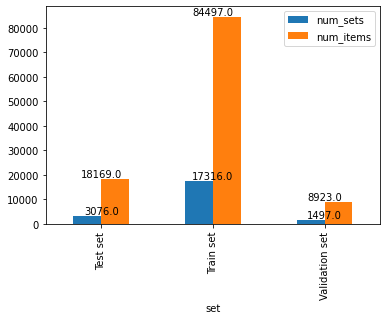

In [87]:
df_summary = pd.DataFrame(columns=['num_sets','num_items','set'])

df_summary = df_summary.append({'num_sets': num_sets_test, 'num_items': num_items_test, 'set':"Test set"}, ignore_index=True)
df_summary = df_summary.append({'num_sets': num_sets_train, 'num_items': num_items_train, 'set':"Train set"}, ignore_index=True)
df_summary = df_summary.append({'num_sets': num_sets_valid, 'num_items': num_items_valid, 'set':"Validation set"}, ignore_index=True)

df_summary.plot(x="set", y=["num_sets", "num_items"], kind="bar")

for i, val in enumerate(df_summary.values):
  # print(i,val)
  plt.text(i, val[0], float(val[0]), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})
  plt.text(i, val[1], float(val[1]), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})

df_summary.head()

In [12]:
# Prepare data
main_cat = 'categorytype'
sub_cat = 'category'

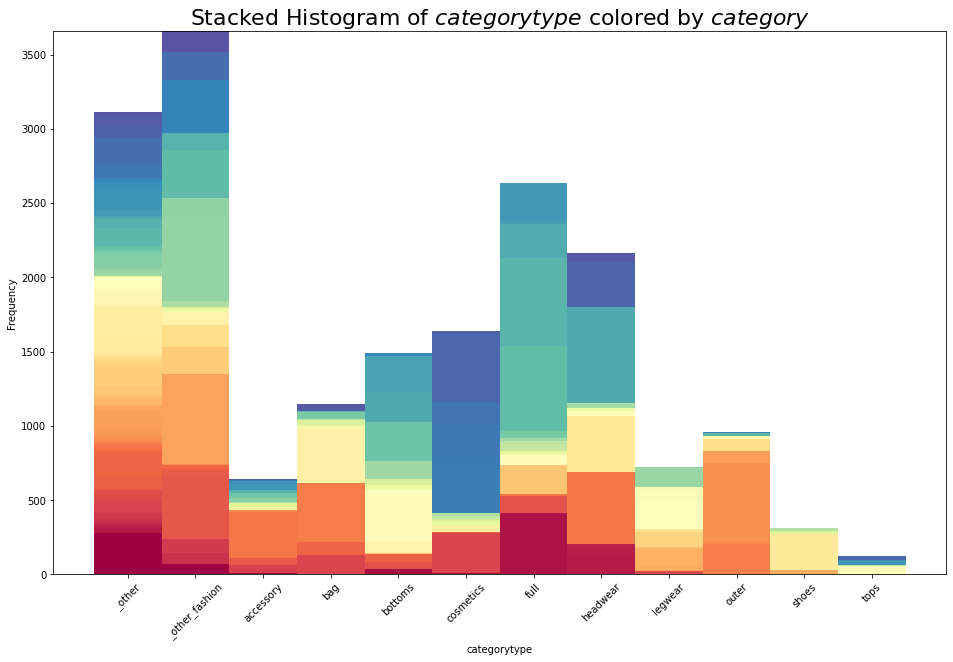

In [31]:
df_agg = df_items.loc[:, [main_cat, sub_cat]].groupby(sub_cat)
vals = [df[main_cat].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,10))
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df_items[main_cat].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)

# Decoration
# plt.legend({group:col for group, col in zip(np.unique(df_items[sub_cat]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${main_cat}$ colored by ${sub_cat}$", fontsize=22)
plt.xlabel(main_cat)
plt.ylabel("Frequency")
# plt.ylim(0, 40)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), labels=np.unique(df_items[main_cat]).tolist(), rotation=45)
plt.show()

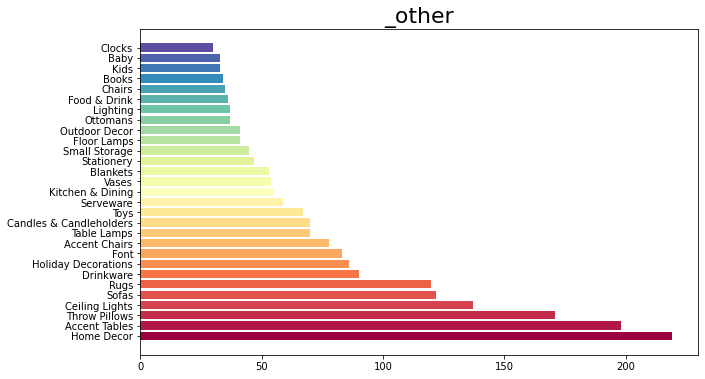

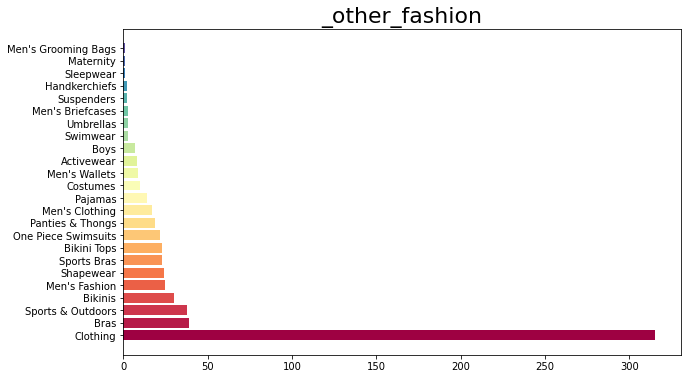

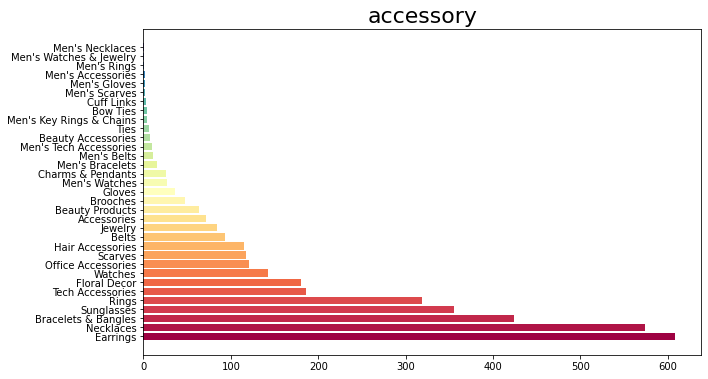

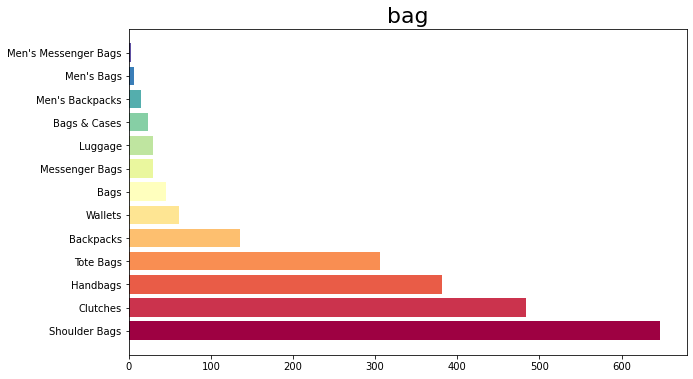

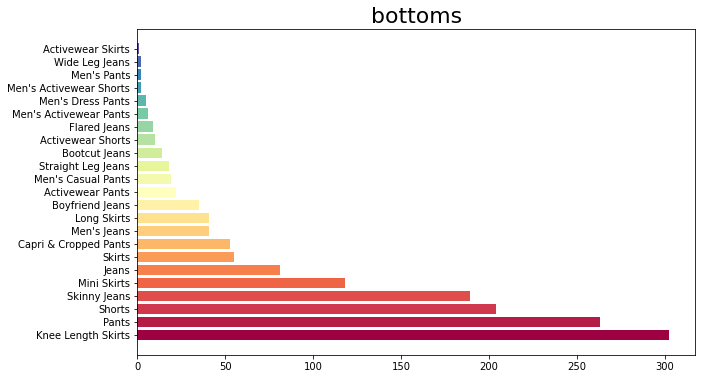

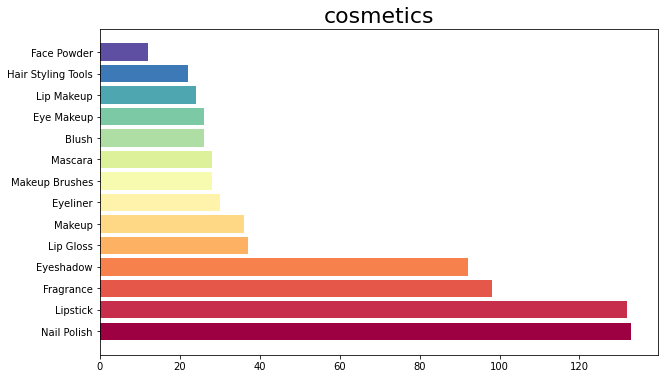

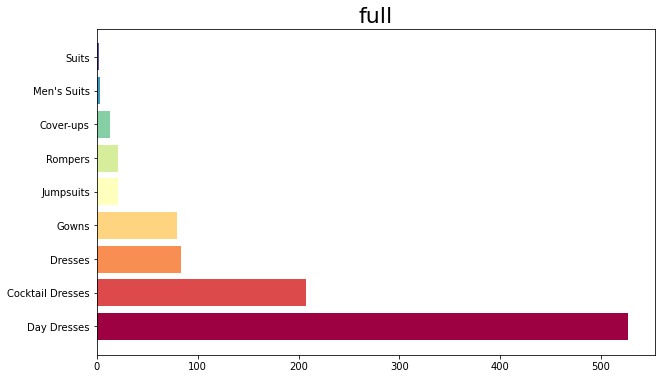

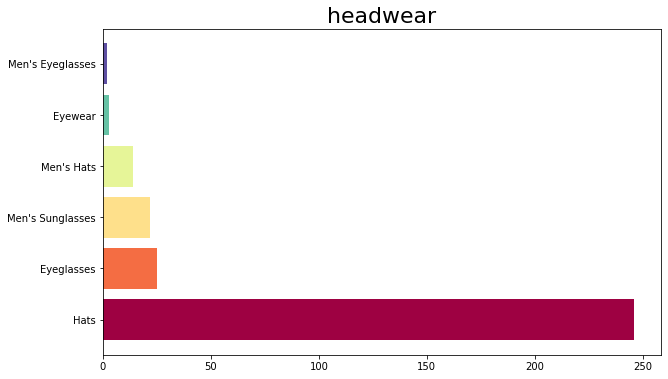

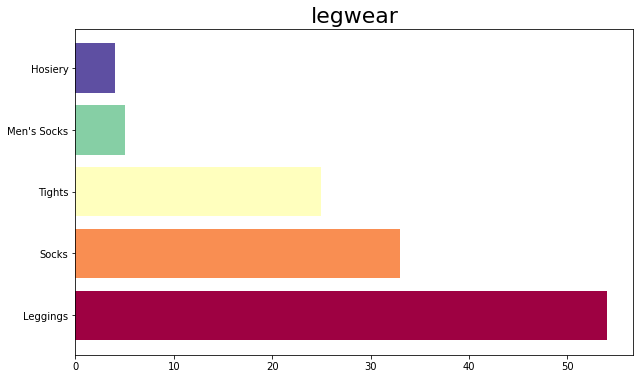

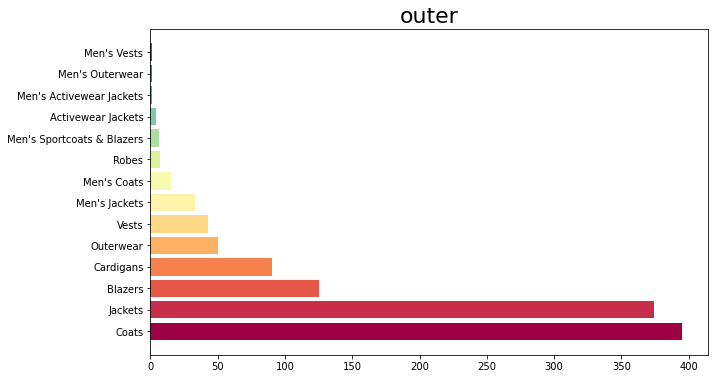

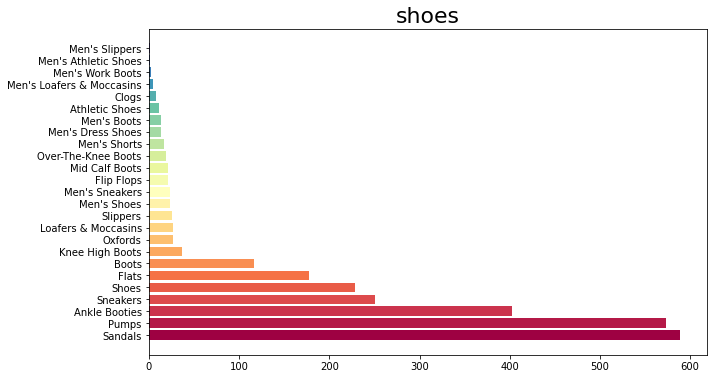

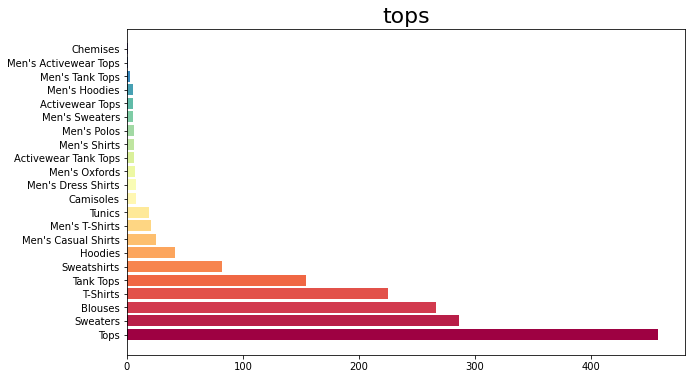

In [30]:
df_agg = df_items.loc[:, [main_cat, sub_cat]].groupby(main_cat)
counter = 0
for i, df in df_agg:
    plt.figure(figsize=(10,6))
    df_agg_sub = df.loc[:, [main_cat, sub_cat]].groupby(sub_cat)

    sub_cat_df = pd.DataFrame(columns=['sub_cat_name','count'])
    for sub_i, sub_df in df_agg_sub:
        if i == '_other' and sub_df.shape[0] < 30:
            continue
            
        sub_cat_df = sub_cat_df.append({'sub_cat_name': sub_i, 'count': sub_df.shape[0]}, ignore_index=True)

    sub_cat_df.sort_values(by=['count'],inplace=True, ascending=False )
    colors = [plt.cm.Spectral(i/float(sub_cat_df.shape[0]-1)) for i in range(sub_cat_df.shape[0])]
#         print(sub_cat_df.head(10))
    plt.barh(sub_cat_df['sub_cat_name'].values, sub_cat_df['count'].values, color=colors)
    plt.title(i, fontsize=22)
    plt.show()
 

In [ ]:
df_items[df_items[CATEGORYTYPE_ID].isin(order)]

,category_id,image,index,likes,name,price,set_id,categorytype_id,categorytype,category
0,17,http://img2.polyvoreimg.com/cgi/img-thing?.out...,1,347,dolce gabbana silk shirt,657.00,119704139,1,tops,Blouses
1,236,http://img2.polyvoreimg.com/cgi/img-thing?.out...,2,1629,long sleeved button detail blazer,160.00,119704139,0,outer,Blazers
2,9,http://img2.polyvoreimg.com/cgi/img-thing?.out...,3,95,pleated skirt,19.00,119704139,3,bottoms,Knee Length Skirts
3,261,http://img1.polyvoreimg.com/cgi/img-thing?.out...,4,254,asos temple shoe boots,36.00,119704139,4,shoes,Ankle Booties
5,24,http://img1.polyvoreimg.com/cgi/img-thing?.out...,1,1271,irregular lapel blue trench coat,170.00,119314458,0,outer,Coats
6,9,http://img1.polyvoreimg.com/cgi/img-thing?.out...,2,166,beautiful cotton lace skirt yellow,99.00,119314458,3,bottoms,Knee Length Skirts
7,46,http://img2.polyvoreimg.com/cgi/img-thing?.out...,3,56,mcq alexander mcqueen mirrored leather sandals,280.00,119314458,4,shoes,Sandals
13,19,http://img1.polyvoreimg.com/cgi/img-thing?.out...,1,6267,oasis jumper,12.00,147361785,1,tops,Sweaters
14,27,http://img2.polyvoreimg.com/cgi/img-thing?.out...,2,8122,polo ralph lauren stretch cotton jeans,96.00,147361785,3,bottoms,Jeans
15,266,http://img2.polyvoreimg.com/cgi/img-thing?.out...,3,10,leather oxford,24.00,147361785,4,shoes,Oxfords


In [ ]:
# make mini data
import json

mode = 'test'
k = 30

np.random.seed(12345)

json_file = './labels/{}_no_dup.json'.format(mode)

df_mini = pd.read_json(json_file).sample(k)

# save
# out_file = './labels/{}_{}.json'.format(mode, k)
# with open(out_file, 'w') as f:
#     json.dump(df_mini.to_dict(orient='records'),
#               f, indent=4)

In [ ]:
# tsv_file = dataset_root_local+'/labels/category_id.tsv'
# # print(tsv_file)
# pd.read_csv(tsv_file, sep='\t')

# category type I made
category_types = [
    "outer",
    "tops",
    "full",
    "bottoms",
    "shoes",
    "legwear",
    "headwear",
    "bag",
    "accessory",
    "cosmetics",
    "_other_fashion",
    "_other",
]

df_ctgtp = pd.Series(category_types).reset_index()
df_ctgtp.columns = ['categorytype_id', 'categorytype']
df_ctgtp

#save
#df_ctgtp.to_csv('../data/shared/MarylandPolyvore/label/categorytype.tsv',
#                sep='\t', index=False)

,categorytype_id,categorytype
0,0,outer
1,1,tops
2,2,full
3,3,bottoms
4,4,shoes
5,5,legwear
6,6,headwear
7,7,bag
8,8,accessory
9,9,cosmetics


In [ ]:
json_file = dataset_root+'/train_no_dup.json'
df = pd.read_json(json_file)
df

,name,views,items,image,likes,date,set_url,set_id,desc
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...
...,...,...,...,...,...,...,...,...,...
17311,2.15.17,183,"[{'index': 1, 'name': 'raey deep v-neck silk c...",http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,117,4 days,http://www.polyvore.com/15.17/set?id=216801059,216801059,A fashion look from February 2017 by kianahall...
17312,tweed,2428,"[{'index': 1, 'name': 'michael kors printed bo...",http://ak1.polyvoreimg.com/cgi/img-set/cid/190...,382,One year,http://www.polyvore.com/tweed/set?id=190488700,190488700,A fashion look from February 2016 by drigomes ...
17313,TV Style: Pretty Little Liars,2184,"[{'index': 1, 'name': 'color block fit flare m...",http://ak2.polyvoreimg.com/cgi/img-set/cid/187...,398,One year,http://www.polyvore.com/tv_style_pretty_little...,187504514,A fashion look from January 2016 by vanjazivad...
17314,60-Second Style: Work Wear,3147,"[{'index': 1, 'name': 'patchwork fit flare dre...",http://ak2.polyvoreimg.com/cgi/img-set/cid/211...,440,Three months,http://www.polyvore.com/60-second_style_work_w...,211085207,A fashion look from November 2016 by beebeely-...


In [ ]:
df_items = json_normalize(df.to_dict(orient='records'),
                             'items', 'set_id')
df_items

,index,name,price,likes,image,categoryid,set_id
0,1,mock neck embroidery suede sweatshirt,24.0,10,http://img2.polyvoreimg.com/cgi/img-thing?.out...,4495,214181831
1,2,luxe double zip hooded jacket,150.0,2250,http://img2.polyvoreimg.com/cgi/img-thing?.out...,25,214181831
2,3,citizens humanity high rise rocket hem jean,248.0,2437,http://img1.polyvoreimg.com/cgi/img-thing?.out...,27,214181831
3,4,suede tie short boots,37.0,2,http://img1.polyvoreimg.com/cgi/img-thing?.out...,261,214181831
4,5,cloth travel school backpack,22.0,2,http://img2.polyvoreimg.com/cgi/img-thing?.out...,259,214181831
...,...,...,...,...,...,...,...
114801,3,christian louboutin kate patent-leather pumps,565.0,7619,http://img1.polyvoreimg.com/cgi/img-thing?.out...,43,211686294
114802,4,jimmy choo women glitter fabric clutch,640.0,1938,http://img1.polyvoreimg.com/cgi/img-thing?.out...,38,211686294
114803,5,mac lipstick,17.0,5080,http://img2.polyvoreimg.com/cgi/img-thing?.out...,200,211686294
114804,6,ysl black edp,84.0,43,http://img2.polyvoreimg.com/cgi/img-thing?.out...,95,211686294


In [ ]:
dup_id = df_items[df_items.duplicated(['set_id', 'categoryid'])]['set_id'].unique()
len(dup_id)
dup_id[:20]

2973

array([120161271, 212745062, 158068564, 215224271, 200282569, 202255709,
       214338048, 214394737, 186446024, 158589036, 107617926, 216886673,
       139151321, 211610841, 118417134, 212431988, 197593425, 196498522,
       216884637, 209480577], dtype=object)

In [ ]:
df = df[~df['set_id'].isin(dup_id)]
df

,date,desc,image,items,likes,name,set_id,set_url,views
0,One month,A fashion look from January 2017 by beebeely-l...,http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,"[{'index': 1, 'name': 'mock neck embroidery su...",394,Casual,214181831,http://www.polyvore.com/casual/set?id=214181831,8743
2,Two years,12.19.14,http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,"[{'index': 1, 'name': 'monki singlet', 'price'...",32,These Chanel bags is a bad habit .x,143656996,http://www.polyvore.com/these_chanel_bags_is_b...,562
3,One year,A fashion look from January 2016 by alyssaclai...,http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",88,Avenger/Supernatural prp,186627934,http://www.polyvore.com/avenger_supernatural_p...,2613
4,5 months,A fashion look from August 2016 by kate-goida ...,http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",3,Boho (39),206969379,http://www.polyvore.com/boho_39/set?id=206969379,62
5,7 months,A fashion look from June 2016 by sara-86 featu...,http://ak1.polyvoreimg.com/cgi/img-set/cid/201...,"[{'index': 1, 'name': 'new look light blue den...",83,Denim on Denim,201969694,http://www.polyvore.com/denim_on/set?id=201969694,276
6,9 days,A fashion look from February 2017 by exco feat...,http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,"[{'index': 1, 'name': 'isabel marant alpaca bl...",395,the people i choose never choose me and my hea...,216470135,http://www.polyvore.com/people_choose_never_me...,1580
7,14 days,A fashion look from February 2017 by rasa-j fe...,http://ak2.polyvoreimg.com/cgi/img-set/cid/216...,"[{'index': 1, 'name': 'oasis shadow bird knit ...",233,Be happy!,216220312,http://www.polyvore.com/be_happy/set?id=216220312,591
8,One year,A fashion look from December 2015 by mcheffer ...,http://ak1.polyvoreimg.com/cgi/img-set/cid/185...,"[{'index': 1, 'name': 'valentino pleated cotto...",239,Enjoy your own company,185225843,http://www.polyvore.com/enjoy_your_own_company...,1142
9,One month,A fashion look from December 2016 by beebeely-...,http://ak2.polyvoreimg.com/cgi/img-set/cid/213...,"[{'index': 1, 'name': 'yoins plus size blue st...",492,Yoins Casual: Faux Fur Vest,213824660,http://www.polyvore.com/yoins_casual_faux_fur_...,24915
10,Two years,A fashion look from April 2014 featuring loose...,http://ak1.polyvoreimg.com/cgi/img-set/cid/118...,"[{'index': 1, 'name': 'official runway web sto...",3979,9. Lovebug,118117317,http://www.polyvore.com/lovebug/set?id=118117317,55501


In [ ]:
tsv_file = './label/category2categorytype.tsv'
df_ctg2ctgtp = pd.read_csv(tsv_file, sep='\t')
df_ctg2ctgtp

,categorytype_id,categorytype,category_id,category,num items
0,0,outer,25,Jackets,3192
1,0,outer,24,Coats,2844
2,0,outer,236,Blazers,889
3,0,outer,18,Cardigans,693
4,0,outer,26,Vests,333
5,0,outer,23,Outerwear,316
6,0,outer,4456,Men's Jackets,160
7,0,outer,250,Robes,22
8,0,outer,256,Activewear Jackets,11
9,0,outer,276,Men's Outerwear,7


In [ ]:
ctgid2ctgtp = dict(zip(
    df_ctg2ctgtp['category_id'],
    df_ctg2ctgtp['categorytype'],
))

In [ ]:
ctgid2ctgtp

{25: 'outer',
 24: 'outer',
 236: 'outer',
 18: 'outer',
 26: 'outer',
 23: 'outer',
 4456: 'outer',
 250: 'outer',
 256: 'outer',
 276: 'outer',
 277: 'outer',
 289: 'outer',
 4455: 'outer',
 4457: 'outer',
 247: 'tops',
 248: 'tops',
 252: 'tops',
 11: 'tops',
 19: 'tops',
 272: 'tops',
 273: 'tops',
 21: 'tops',
 286: 'tops',
 17: 'tops',
 104: 'tops',
 309: 'tops',
 4495: 'tops',
 4496: 'tops',
 341: 'tops',
 342: 'tops',
 343: 'tops',
 275: 'tops',
 4454: 'tops',
 4464: 'tops',
 15: 'tops',
 4497: 'tops',
 4498: 'tops',
 30: 'full',
 4: 'full',
 5: 'full',
 3: 'full',
 6: 'full',
 244: 'full',
 243: 'full',
 1607: 'full',
 281: 'full',
 237: 'bottoms',
 29: 'bottoms',
 9: 'bottoms',
 28: 'bottoms',
 8: 'bottoms',
 27: 'bottoms',
 240: 'bottoms',
 332: 'bottoms',
 7: 'bottoms',
 10: 'bottoms',
 278: 'bottoms',
 310: 'bottoms',
 253: 'bottoms',
 4458: 'bottoms',
 238: 'bottoms',
 239: 'bottoms',
 254: 'bottoms',
 255: 'bottoms',
 279: 'bottoms',
 287: 'bottoms',
 288: 'bottoms',
 44

In [ ]:
# category type order I decide
ctgtp_order = [
    "outer",
    "tops",
    "full",
    "bottoms",
    "shoes",
    "legwear",
    #"headwear",
    #"bag",
    #"accessory",
    #"cosmetics",
    #"_other_fashion",
    #"_other",
]

In [ ]:
df_items = json_normalize(df.to_dict(orient='records'),
                             'items', 'set_id')
df_items['categorytype'] = df_items['categoryid']\
    .apply(lambda ctgid:ctgid2ctgtp[ctgid])
df_items

,categoryid,image,index,likes,name,price,set_id,categorytype
0,4495,http://img2.polyvoreimg.com/cgi/img-thing?.out...,1,10,mock neck embroidery suede sweatshirt,24.0,214181831,tops
1,25,http://img2.polyvoreimg.com/cgi/img-thing?.out...,2,2250,luxe double zip hooded jacket,150.0,214181831,outer
2,27,http://img1.polyvoreimg.com/cgi/img-thing?.out...,3,2437,citizens humanity high rise rocket hem jean,248.0,214181831,bottoms
3,261,http://img1.polyvoreimg.com/cgi/img-thing?.out...,4,2,suede tie short boots,37.0,214181831,shoes
4,259,http://img2.polyvoreimg.com/cgi/img-thing?.out...,5,2,cloth travel school backpack,22.0,214181831,bag
5,1967,http://img1.polyvoreimg.com/cgi/img-thing?.out...,6,3,,160.0,214181831,accessory
6,2,http://img2.polyvoreimg.com/cgi/img-thing?.out...,7,51,polyvore,-1.0,214181831,_other_fashion
7,21,http://img2.polyvoreimg.com/cgi/img-thing?.out...,1,1290,nirvana distressed t-shirt,10.0,120161271,tops
8,237,http://img2.polyvoreimg.com/cgi/img-thing?.out...,2,17406,rag bone rock w/ black skinny jeans,235.0,120161271,bottoms
9,49,http://img2.polyvoreimg.com/cgi/img-thing?.out...,3,10734,vans authentic black mono trainers,43.0,120161271,shoes


In [ ]:
df_items[df_items.duplicated(['set_id', 'categoryid'])]

,categoryid,image,index,likes,name,price,set_id,categorytype
11,106,http://img1.polyvoreimg.com/cgi/img-thing?.out...,5,469,veil logo rubber bracelet,7.00,120161271,accessory
12,106,http://img2.polyvoreimg.com/cgi/img-thing?.out...,6,1092,rubber bracelet hot topic,29.00,120161271,accessory
13,106,http://img2.polyvoreimg.com/cgi/img-thing?.out...,7,733,romance i'm,20.00,120161271,accessory
14,106,http://img1.polyvoreimg.com/cgi/img-thing?.out...,8,387,disney alice wonderland cat rubber bracelet ho...,8.50,120161271,accessory
154,43,http://img1.polyvoreimg.com/cgi/img-thing?.out...,3,397,women's miu miu feather block heel mary jane pump,850.00,212745062,shoes
161,9,http://img1.polyvoreimg.com/cgi/img-thing?.out...,3,8602,carven knee length pleated skirt,89.00,158068564,bottoms
162,9,http://img1.polyvoreimg.com/cgi/img-thing?.out...,4,22250,choies blue high waist silky skater skirt belt,20.00,158068564,bottoms
171,19,http://img2.polyvoreimg.com/cgi/img-thing?.out...,2,3,lace color block oversized sweater,31.00,215224271,tops
172,19,http://img1.polyvoreimg.com/cgi/img-thing?.out...,3,6301,row top,345.00,215224271,tops
224,46,http://img2.polyvoreimg.com/cgi/img-thing?.out...,4,32,suede flat sandals,225.00,200282569,shoes


In [ ]:
df = pd.merge(
    df[df.columns.difference(['items'])],
    df_items.groupby('set_id')\
        [list(set(df_items.columns)-{'set_id'})]\
        .apply(lambda df: df.to_dict(orient='records'))\
        .rename('items').reset_index(),
    on='set_id')
df

,date,desc,image,likes,name,set_id,set_url,views,items
0,One month,A fashion look from January 2017 by beebeely-l...,http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,Casual,214181831,http://www.polyvore.com/casual/set?id=214181831,8743,[{'name': 'mock neck embroidery suede sweatshi...
1,Two years,A fashion look from April 2014 featuring destr...,http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Being a Vans shoe model with Luke. Idk about t...,120161271,http://www.polyvore.com/being_vans_shoe_model_...,188,"[{'name': 'nirvana distressed t-shirt', 'categ..."
2,Two years,12.19.14,http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,These Chanel bags is a bad habit .x,143656996,http://www.polyvore.com/these_chanel_bags_is_b...,562,"[{'name': 'monki singlet', 'categoryid': 104, ..."
3,One year,A fashion look from January 2016 by alyssaclai...,http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,Avenger/Supernatural prp,186627934,http://www.polyvore.com/avenger_supernatural_p...,2613,"[{'name': 'tops', 'categoryid': 11, 'likes': 2..."
4,5 months,A fashion look from August 2016 by kate-goida ...,http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,Boho (39),206969379,http://www.polyvore.com/boho_39/set?id=206969379,62,[{'name': 'yoins leather sexy v-neck sleeveles...
5,7 months,A fashion look from June 2016 by sara-86 featu...,http://ak1.polyvoreimg.com/cgi/img-set/cid/201...,83,Denim on Denim,201969694,http://www.polyvore.com/denim_on/set?id=201969694,276,[{'name': 'new look light blue denim oversized...
6,9 days,A fashion look from February 2017 by exco feat...,http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,395,the people i choose never choose me and my hea...,216470135,http://www.polyvore.com/people_choose_never_me...,1580,"[{'name': 'isabel marant alpaca blend jumper',..."
7,14 days,A fashion look from February 2017 by rasa-j fe...,http://ak2.polyvoreimg.com/cgi/img-set/cid/216...,233,Be happy!,216220312,http://www.polyvore.com/be_happy/set?id=216220312,591,"[{'name': 'oasis shadow bird knit pink', 'cate..."
8,One year,A fashion look from December 2015 by mcheffer ...,http://ak1.polyvoreimg.com/cgi/img-set/cid/185...,239,Enjoy your own company,185225843,http://www.polyvore.com/enjoy_your_own_company...,1142,[{'name': 'valentino pleated cotton-blend dres...
9,One month,A fashion look from December 2016 by beebeely-...,http://ak2.polyvoreimg.com/cgi/img-set/cid/213...,492,Yoins Casual: Faux Fur Vest,213824660,http://www.polyvore.com/yoins_casual_faux_fur_...,24915,"[{'name': 'yoins plus size blue stripe shirt',..."


In [ ]:
items = df['items'][0]

In [ ]:
def filter_items(items, ctgtp_order=ctgtp_order):
    items = [item
             for item in items
             if item['categorytype'] in ctgtp_order]
    items = sorted(items,
                   key=lambda item:\
                   ctgtp_order.index(item['categorytype']))
    return items

NameError: ignored

In [ ]:
filter_items(items)

[{'name': 'luxe double zip hooded jacket',
  'categoryid': 25,
  'likes': 2250,
  'price': 150.0,
  'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188778349',
  'index': 2,
  'categorytype': 'outer'},
 {'name': 'mock neck embroidery suede sweatshirt',
  'categoryid': 4495,
  'likes': 10,
  'price': 24.0,
  'image': 'http://img2.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194508109',
  'index': 1,
  'categorytype': 'tops'},
 {'name': 'citizens humanity high rise rocket hem jean',
  'categoryid': 27,
  'likes': 2437,
  'price': 248.0,
  'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=188977857',
  'index': 3,
  'categorytype': 'bottoms'},
 {'name': 'suede tie short boots',
  'categoryid': 261,
  'likes': 2,
  'price': 37.0,
  'image': 'http://img1.polyvoreimg.com/cgi/img-thing?.out=jpg&size=m&tid=194942557',
  'index': 4,
  'categorytype': 'shoes'}]

In [ ]:
df['items'].apply(len).value_counts()

8    6767
7    3207
6    3077
5    2699
4    1566
Name: items, dtype: int64

In [ ]:
df['items'] = df['items'].apply(filter_items)
df

,date,desc,image,likes,name,set_id,set_url,views,items
0,One month,A fashion look from January 2017 by beebeely-l...,http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,Casual,214181831,http://www.polyvore.com/casual/set?id=214181831,8743,"[{'name': 'luxe double zip hooded jacket', 'ca..."
1,Two years,A fashion look from April 2014 featuring destr...,http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Being a Vans shoe model with Luke. Idk about t...,120161271,http://www.polyvore.com/being_vans_shoe_model_...,188,"[{'name': 'nirvana distressed t-shirt', 'categ..."
2,Two years,12.19.14,http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,These Chanel bags is a bad habit .x,143656996,http://www.polyvore.com/these_chanel_bags_is_b...,562,"[{'name': 'joy denim jacket', 'categoryid': 25..."
3,One year,A fashion look from January 2016 by alyssaclai...,http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,Avenger/Supernatural prp,186627934,http://www.polyvore.com/avenger_supernatural_p...,2613,"[{'name': 'tops', 'categoryid': 11, 'likes': 2..."
4,5 months,A fashion look from August 2016 by kate-goida ...,http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,Boho (39),206969379,http://www.polyvore.com/boho_39/set?id=206969379,62,[{'name': 'solid color long sleeve irregular b...
5,7 months,A fashion look from June 2016 by sara-86 featu...,http://ak1.polyvoreimg.com/cgi/img-set/cid/201...,83,Denim on Denim,201969694,http://www.polyvore.com/denim_on/set?id=201969694,276,[{'name': 'new look light blue denim oversized...
6,9 days,A fashion look from February 2017 by exco feat...,http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,395,the people i choose never choose me and my hea...,216470135,http://www.polyvore.com/people_choose_never_me...,1580,"[{'name': 'isabel marant alpaca blend jumper',..."
7,14 days,A fashion look from February 2017 by rasa-j fe...,http://ak2.polyvoreimg.com/cgi/img-set/cid/216...,233,Be happy!,216220312,http://www.polyvore.com/be_happy/set?id=216220312,591,"[{'name': 'oasis shadow bird knit pink', 'cate..."
8,One year,A fashion look from December 2015 by mcheffer ...,http://ak1.polyvoreimg.com/cgi/img-set/cid/185...,239,Enjoy your own company,185225843,http://www.polyvore.com/enjoy_your_own_company...,1142,"[{'name': 'valentino wool-blend coat', 'catego..."
9,One month,A fashion look from December 2016 by beebeely-...,http://ak2.polyvoreimg.com/cgi/img-set/cid/213...,492,Yoins Casual: Faux Fur Vest,213824660,http://www.polyvore.com/yoins_casual_faux_fur_...,24915,[{'name': 'yoins grey sleeveless faux fur coat...


In [ ]:
df['items'].apply(len).value_counts()

3    7586
4    4695
2    3310
0     542
5     509
1     457
6     110
8      61
7      46
Name: items, dtype: int64

In [ ]:
df = df[(df['items'].apply(len) >= 2)
      & (df['items'].apply(len) <= 5)].reset_index(drop=True)
df

,date,desc,image,likes,name,set_id,set_url,views,items
0,One month,A fashion look from January 2017 by beebeely-l...,http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,Casual,214181831,http://www.polyvore.com/casual/set?id=214181831,8743,"[{'name': 'luxe double zip hooded jacket', 'ca..."
1,Two years,A fashion look from April 2014 featuring destr...,http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Being a Vans shoe model with Luke. Idk about t...,120161271,http://www.polyvore.com/being_vans_shoe_model_...,188,"[{'name': 'nirvana distressed t-shirt', 'categ..."
2,Two years,12.19.14,http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,These Chanel bags is a bad habit .x,143656996,http://www.polyvore.com/these_chanel_bags_is_b...,562,"[{'name': 'joy denim jacket', 'categoryid': 25..."
3,One year,A fashion look from January 2016 by alyssaclai...,http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,Avenger/Supernatural prp,186627934,http://www.polyvore.com/avenger_supernatural_p...,2613,"[{'name': 'tops', 'categoryid': 11, 'likes': 2..."
4,5 months,A fashion look from August 2016 by kate-goida ...,http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,Boho (39),206969379,http://www.polyvore.com/boho_39/set?id=206969379,62,[{'name': 'solid color long sleeve irregular b...
5,7 months,A fashion look from June 2016 by sara-86 featu...,http://ak1.polyvoreimg.com/cgi/img-set/cid/201...,83,Denim on Denim,201969694,http://www.polyvore.com/denim_on/set?id=201969694,276,[{'name': 'new look light blue denim oversized...
6,9 days,A fashion look from February 2017 by exco feat...,http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,395,the people i choose never choose me and my hea...,216470135,http://www.polyvore.com/people_choose_never_me...,1580,"[{'name': 'isabel marant alpaca blend jumper',..."
7,14 days,A fashion look from February 2017 by rasa-j fe...,http://ak2.polyvoreimg.com/cgi/img-set/cid/216...,233,Be happy!,216220312,http://www.polyvore.com/be_happy/set?id=216220312,591,"[{'name': 'oasis shadow bird knit pink', 'cate..."
8,One year,A fashion look from December 2015 by mcheffer ...,http://ak1.polyvoreimg.com/cgi/img-set/cid/185...,239,Enjoy your own company,185225843,http://www.polyvore.com/enjoy_your_own_company...,1142,"[{'name': 'valentino wool-blend coat', 'catego..."
9,One month,A fashion look from December 2016 by beebeely-...,http://ak2.polyvoreimg.com/cgi/img-set/cid/213...,492,Yoins Casual: Faux Fur Vest,213824660,http://www.polyvore.com/yoins_casual_faux_fur_...,24915,[{'name': 'yoins grey sleeveless faux fur coat...


In [ ]:
df['items'].apply(len).value_counts()

3    7586
4    4695
2    3310
5     509
Name: items, dtype: int64

In [ ]:
def _remove_from_list(ls, ids):
    if type(ids) == int:
        ids = [ids]

    return [
        e for e in ls
        if e not in ids]

_remove_from_list(list(range(5)), 2)
_remove_from_list(list(range(5)), [0,3])

[0, 1, 3, 4]

[1, 2, 4]